# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url =f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=263af797f39043e0e35be298b89cd9fe&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=263af797f39043e0e35be298b89cd9fe&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uturoa
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | vilyuysk
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | wildwood
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | adamovka
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | puerto cabezas
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | ribeira brava
Processing Record 17 of Set 1 | egilsstadir
Processing Record 18 of Set 1 | sirte
Processing Record 19 of Set 1 | kutum
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | teluk nibung
Proce

City not found. Skipping...
Processing Record 41 of Set 4 | mejit
Processing Record 42 of Set 4 | yanbu
Processing Record 43 of Set 4 | constantia
Processing Record 44 of Set 4 | waynesboro
Processing Record 45 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 46 of Set 4 | saipan
Processing Record 47 of Set 4 | bahau
Processing Record 48 of Set 4 | stanley
Processing Record 49 of Set 4 | cill airne
Processing Record 0 of Set 5 | tabas
Processing Record 1 of Set 5 | srandakan
Processing Record 2 of Set 5 | puno
Processing Record 3 of Set 5 | papao
Processing Record 4 of Set 5 | wonsan
Processing Record 5 of Set 5 | woodward
Processing Record 6 of Set 5 | antalaha
Processing Record 7 of Set 5 | mariental
Processing Record 8 of Set 5 | richards bay
Processing Record 9 of Set 5 | salalah
Processing Record 10 of Set 5 | nouadhibou
Processing Record 11 of Set 5 | mogocha
Processing Record 12 of Set 5 | baglung
Processing Record 13 of Set 5 | mount pearl
Processing Record 14

Processing Record 30 of Set 8 | calama
Processing Record 31 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 32 of Set 8 | skeldon
Processing Record 33 of Set 8 | tsiombe
Processing Record 34 of Set 8 | shihezi
Processing Record 35 of Set 8 | san rafael
Processing Record 36 of Set 8 | puerto francisco de orellana
Processing Record 37 of Set 8 | zomin shaharchasi
City not found. Skipping...
Processing Record 38 of Set 8 | hanawa
Processing Record 39 of Set 8 | labrador city
Processing Record 40 of Set 8 | honiara
Processing Record 41 of Set 8 | odda
Processing Record 42 of Set 8 | ambalangoda
Processing Record 43 of Set 8 | ciudad lazaro cardenas
Processing Record 44 of Set 8 | zheshart
Processing Record 45 of Set 8 | thulamahashi
Processing Record 46 of Set 8 | corumba
Processing Record 47 of Set 8 | port saint john's
Processing Record 48 of Set 8 | bikenibeu village
Processing Record 49 of Set 8 | safford
Processing Record 0 of Set 9 | rovaniemi
Proces

Processing Record 17 of Set 12 | champerico
Processing Record 18 of Set 12 | misratah
Processing Record 19 of Set 12 | harper
Processing Record 20 of Set 12 | chegdomyn
Processing Record 21 of Set 12 | wa
City not found. Skipping...
Processing Record 22 of Set 12 | kavaratti
Processing Record 23 of Set 12 | stiens
Processing Record 24 of Set 12 | kodinsk
Processing Record 25 of Set 12 | castillos
Processing Record 26 of Set 12 | okha
Processing Record 27 of Set 12 | odesskoye
Processing Record 28 of Set 12 | sakakah
Processing Record 29 of Set 12 | stony plain
Processing Record 30 of Set 12 | al fujairah city
Processing Record 31 of Set 12 | port augusta
Processing Record 32 of Set 12 | foso
Processing Record 33 of Set 12 | korotchaevo
City not found. Skipping...
Processing Record 34 of Set 12 | berdigestyakh
Processing Record 35 of Set 12 | indaparapeo
Processing Record 36 of Set 12 | susangerd
Processing Record 37 of Set 12 | zakynthos
Processing Record 38 of Set 12 | vernon
Processi

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uturoa,-16.7333,-151.4333,27.68,74,4,7.71,PF,1738274331
1,bethel,41.3712,-73.4140,-0.03,47,31,1.79,US,1738274142
2,vilyuysk,63.7553,121.6247,-40.95,100,87,1.32,RU,1738274267
3,bredasdorp,-34.5322,20.0403,20.55,61,0,4.77,ZA,1738274116
4,margaret river,-33.9500,115.0667,15.74,90,5,3.18,AU,1738274121


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uturoa,-16.7333,-151.4333,27.68,74,4,7.71,PF,1738274331
1,bethel,41.3712,-73.4140,-0.03,47,31,1.79,US,1738274142
2,vilyuysk,63.7553,121.6247,-40.95,100,87,1.32,RU,1738274267
3,bredasdorp,-34.5322,20.0403,20.55,61,0,4.77,ZA,1738274116
4,margaret river,-33.9500,115.0667,15.74,90,5,3.18,AU,1738274121


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

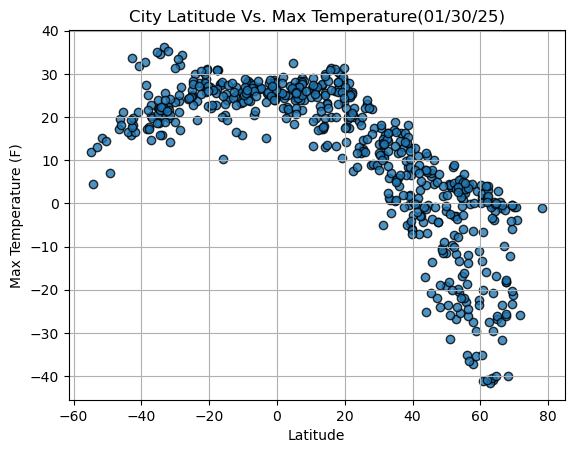

In [29]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



plt.scatter(lats,
            max_temps,
            edgecolor="black", 
            linewidth=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

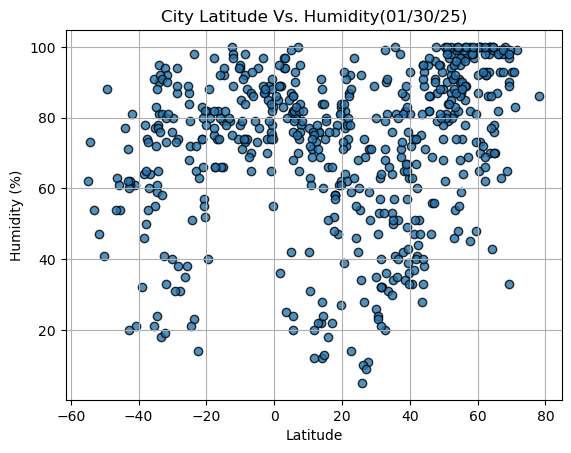

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", 
            linewidth=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

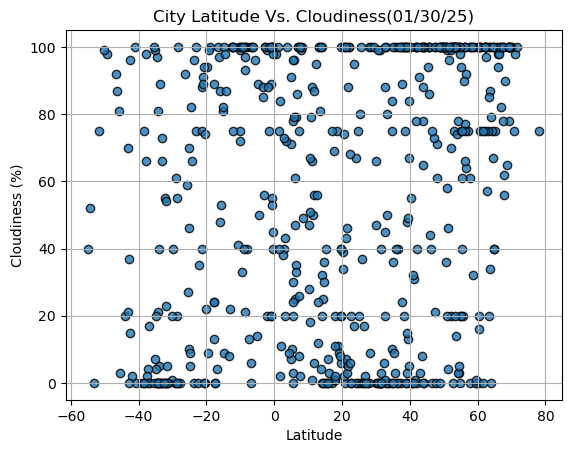

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", 
            linewidth=1, marker="o",
            alpha=0.8, 
            label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

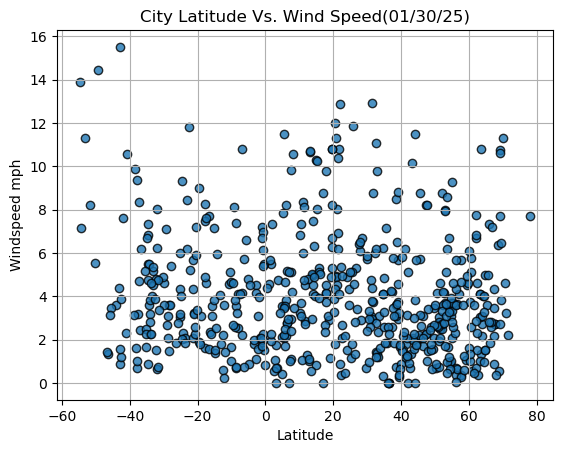

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", 
            linewidth=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err=stats.linregress(x.y)
    line=slope*x+intercept

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,-0.03,47,31,1.79,US,1738274142
2,vilyuysk,63.7553,121.6247,-40.95,100,87,1.32,RU,1738274267
6,iskateley,67.6803,53.1512,-18.19,99,56,2.72,RU,1738274341
8,iqaluit,63.7506,-68.5145,-20.73,70,100,10.80,CA,1738274250
9,wildwood,38.5828,-90.6629,8.52,86,100,3.60,US,1738274345


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uturoa,-16.7333,-151.4333,27.68,74,4,7.71,PF,1738274331
3,bredasdorp,-34.5322,20.0403,20.55,61,0,4.77,ZA,1738274116
4,margaret river,-33.9500,115.0667,15.74,90,5,3.18,AU,1738274121
5,port-aux-francais,-49.3500,70.2167,6.94,88,98,14.43,TF,1738274114
7,grytviken,-54.2811,-36.5092,4.60,73,52,7.14,GS,1738274131


###  Temperature vs. Latitude Linear Regression Plot

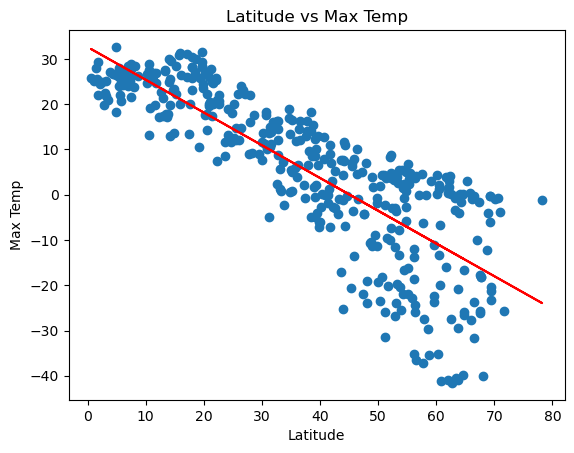

r-2 value: 0.6787417888754728


In [36]:
# Linear regression on Northern Hemisphere

northern_hemisphere=northern_hemi_df[northern_hemi_df['Lat']>=0]

x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Max Temp']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()
print(f"r-2 value:", r_squared)


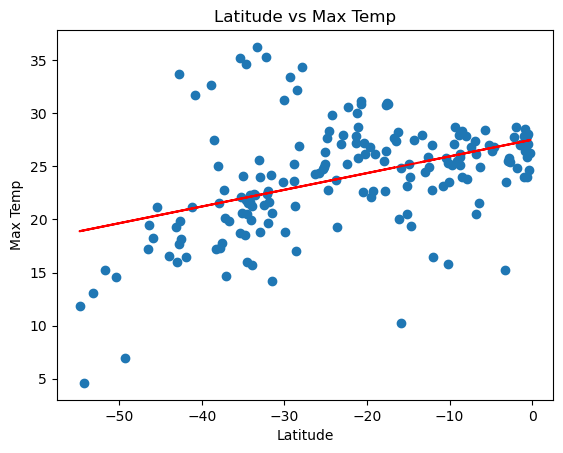

r-2 value: 0.1835997158905364


In [37]:
# Linear regression on Southern Hemisphere
southern_hemisphere=southern_hemi_df[southern_hemi_df['Lat']<0]

x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Max Temp']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()
print(f"r-2 value:", r_squared)

### Humidity vs. Latitude Linear Regression Plot

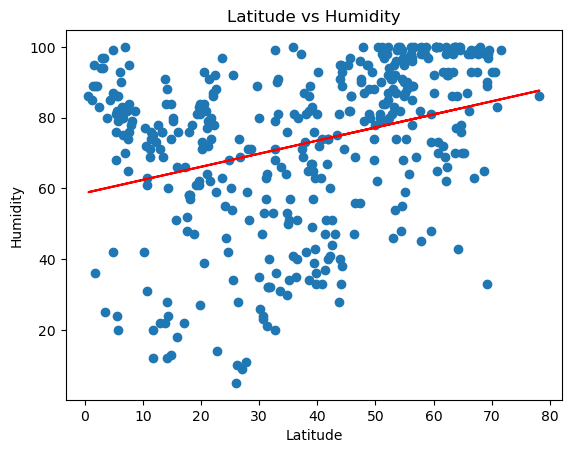

r-2 value: 0.1032492169464144


In [38]:
# Northern Hemisphere
northern_hemisphere=northern_hemi_df[northern_hemi_df['Lat']>=0]

x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Humidity']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()
print(f"r-2 value:", r_squared)

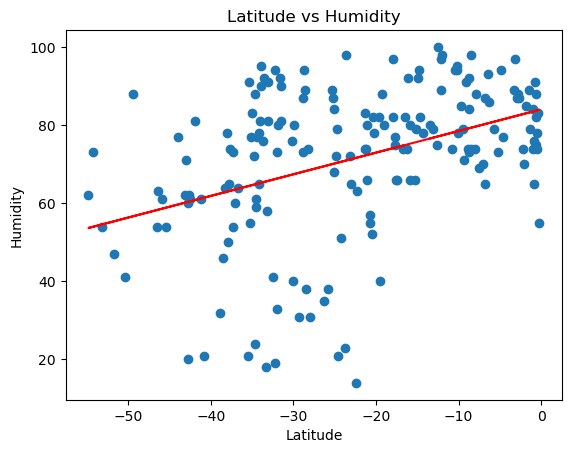

r-2 value: 0.1642657185778734


In [39]:
# Southern Hemisphere
southern_hemisphere=southern_hemi_df[southern_hemi_df['Lat']<0]

x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Humidity']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()
print(f"r-2 value:", r_squared)

### Cloudiness vs. Latitude Linear Regression Plot

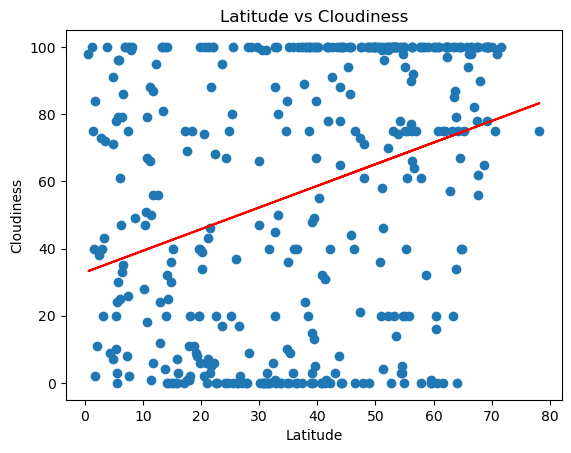

r-2 value: 0.10248087740978934


In [40]:
# Northern Hemisphere
northern_hemisphere=northern_hemi_df[northern_hemi_df['Lat']>=0]

x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Cloudiness']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()
print(f"r-2 value:", r_squared)

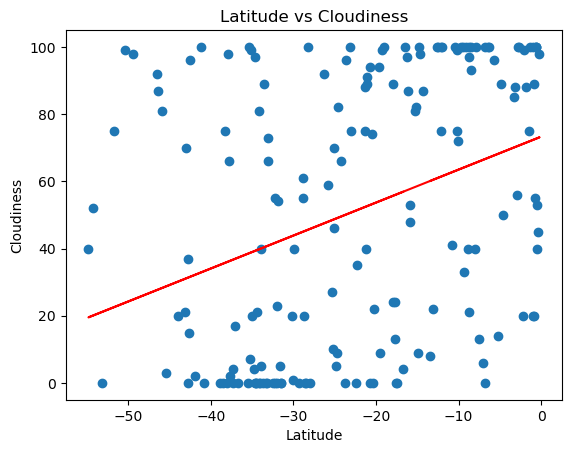

r-2 value: 0.12110906026762557


In [41]:
# Southern Hemisphere
southern_hemisphere=southern_hemi_df[southern_hemi_df['Lat']<0]

x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Cloudiness']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()
print(f"r-2 value:", r_squared)

### Wind Speed vs. Latitude Linear Regression Plot

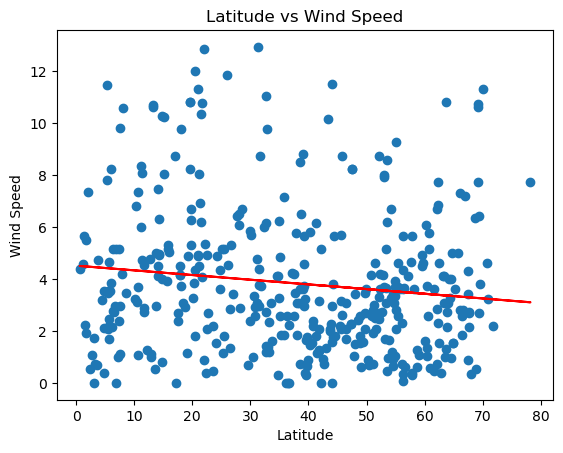

The r^2 value is : 0.017041419929757034


In [42]:
# Northern Hemisphere
northern_hemisphere=northern_hemi_df[northern_hemi_df['Lat']>=0]

x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Wind Speed']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()
print(f"The r^2 value is :", r_squared)

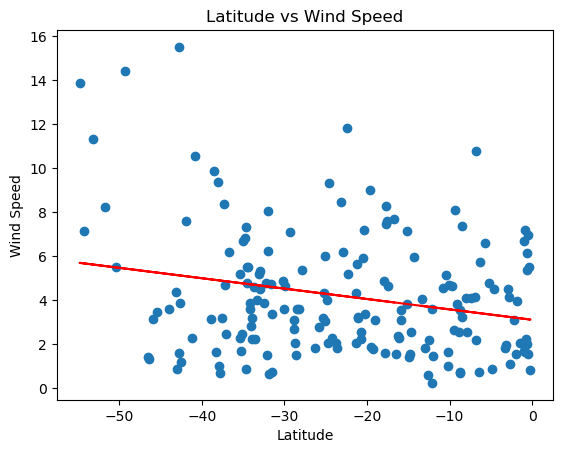

r-2 value: 0.05736889520823501


In [43]:
# Southern Hemisphere
southern_hemisphere=southern_hemi_df[southern_hemi_df['Lat']<0]

x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Wind Speed']

slope,intercept,r_value,p_value,std_err=linregress(x_values,y_values)

r_squared= r_value**2

plt.scatter(x_values, y_values)

regression_line=slope*x_values+intercept
plt.plot(x_values,regression_line,color='red')

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()
print(f"r-2 value:", r_squared)